# MACHINE LEARNING PROJECT - THYROID CANCER

### STEP 0. BUSINESS UNDERSTANDING

This notebook provides an example of a machine learning model to predict if a person who had thyroid cancer could have it again after initial treatment based on the given features. The dataset used in this notebook is the thyroid cancer dataset from Khwaish Saxena user of Kaggle: https://www.kaggle.com/datasets/khwaishsaxena/thyroid-cancer-dataset. The dataset contains 17 columns and 383 rows. The columns are as follows:

#### *FEATURES*

- **Age**: The age at the time of diagnosis or treatment

- **Gender**: The gender of the patient (male or female)

- **Smoking**: Whether the patient is a smoker or not
- **Hx Smoking**: Smoking history of the patient (e.g., whether they have ever smoked)
- **Hx Radiotherapy**: History of radiotherapy treatment for any condition
- **Thyroid Function**: The status of thyroid function, possibly indicating if there are any abnormalities
- **Physical Examination**: Findings from a physical examination of the patient
- **Adenopathy**: Presence or absence of enlarged lymph nodes (adenopathy) in the neck region
- **Pathology**: Specific type of thyroid cancer determined by the pathological examination of biopsy samples
- **Focality**: Whether the cancer is unifocal (limited to one location) or multifocal (present in multiple locations)
- **Risk**: The risk category of the cancer based on various factors, such as tumor size, extent of spread, and histological type
- **T**: Tumor classification based on its size and extent of invasion into nearby structures
- **N**: Nodal classification indicating the involvement of lymph node
- **M**: Metastasis classification indicating the presence or absence of distant metastases
- **Stage**: The overall stage of the cancer, typically determined by combining T, N, and M classifications
- **Response**: Response to treatment, indicating whether the cancer responded positively, negatively, or remained stable after treatment

#### *TARGET*

- **Recurred**: Has the cancer recurred after initial treatment

### STEP 1. IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os
import time
import sys

sys.path.append('../utils')
import funciones as fn

from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

import pickle

### STEP 2. LOAD DATA

In [2]:
df = pd.read_csv('../data/dataset.csv')

### STEP 3. VISUALITATION OF DATA AND VARIABLE UNDERSTANDING

First of all, we take a look of the data

In [3]:
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


We make an small visualitation of the data: type, missing values, unique values and cardinality

In [4]:
fn.describe_df(df).T

,DATE_TYPE,MISSINGS(%),UNIQUE_VALUES,CARDIN(%)
COL_N,,,,
Age,int64,0.0,65,16.97
Gender,object,0.0,2,0.52
Smoking,object,0.0,2,0.52
Hx Smoking,object,0.0,2,0.52
Hx Radiothreapy,object,0.0,2,0.52
Thyroid Function,object,0.0,5,1.31
Physical Examination,object,0.0,5,1.31
Adenopathy,object,0.0,6,1.57
Pathology,object,0.0,4,1.04


*We have not any missing values in the dataset*

We check the current type of each variable and compare them with the type suggested from the function

In [5]:
fn.tipifica_variables(df)

,nombre_variable,dtype,tipo_sugerido
0,Age,int64,Numerica discreta
1,Gender,object,Binaria
2,Smoking,object,Binaria
3,Hx Smoking,object,Binaria
4,Hx Radiothreapy,object,Binaria
5,Thyroid Function,object,Categorica
6,Physical Examination,object,Categorica
7,Adenopathy,object,Categorica
8,Pathology,object,Categorica
9,Focality,object,Binaria


#### STEP 3.1. Identifying the target variable

In [6]:
target = 'Recurred'

### STEP 4. TRAIN-TEST SPLIT

In [7]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state= 42)

In [8]:
print(train_set.shape)
print(test_set.shape)

(306, 17)
(77, 17)


We make the pair variables X,y for train and test

In [9]:
X_train = train_set.drop(target, axis = 1)
y_train = train_set[target]

X_test = test_set.drop(target, axis = 1)
y_test = test_set[target]

### STEP 5. FEATURE ANALYSIS

STEP 5.1. Target analysis

In [10]:
train_set[target].value_counts(True)

Recurred
No     0.70915
Yes    0.29085
Name: proportion, dtype: float64

<Axes: xlabel='Recurred'>

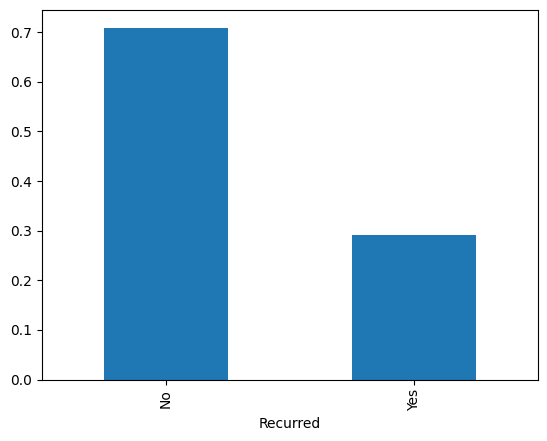

In [11]:
train_set[target].value_counts(True).plot(kind='bar')

*The target variable is not balanced, so firstly we can try to improve the model measurements with the parameter of the own models*

We map the target variable from 'No' and 'Yes' to 0 and 1 respectively.

In [12]:
y_train = y_train.map({'No': 0, 'Yes': 1}).copy().astype('boolean')

#### STEP 5.2. Analysis of the other features

In [13]:
# Categorical features

cat_features = X_train.select_dtypes(include='object').columns.tolist()
cat_features

['Gender',
 'Smoking',
 'Hx Smoking',
 'Hx Radiothreapy',
 'Thyroid Function',
 'Physical Examination',
 'Adenopathy',
 'Pathology',
 'Focality',
 'Risk',
 'T',
 'N',
 'M',
 'Stage',
 'Response']

In [14]:
# Numerical features

num_features = X_train.select_dtypes(include='number').columns.tolist()
num_features

['Age']

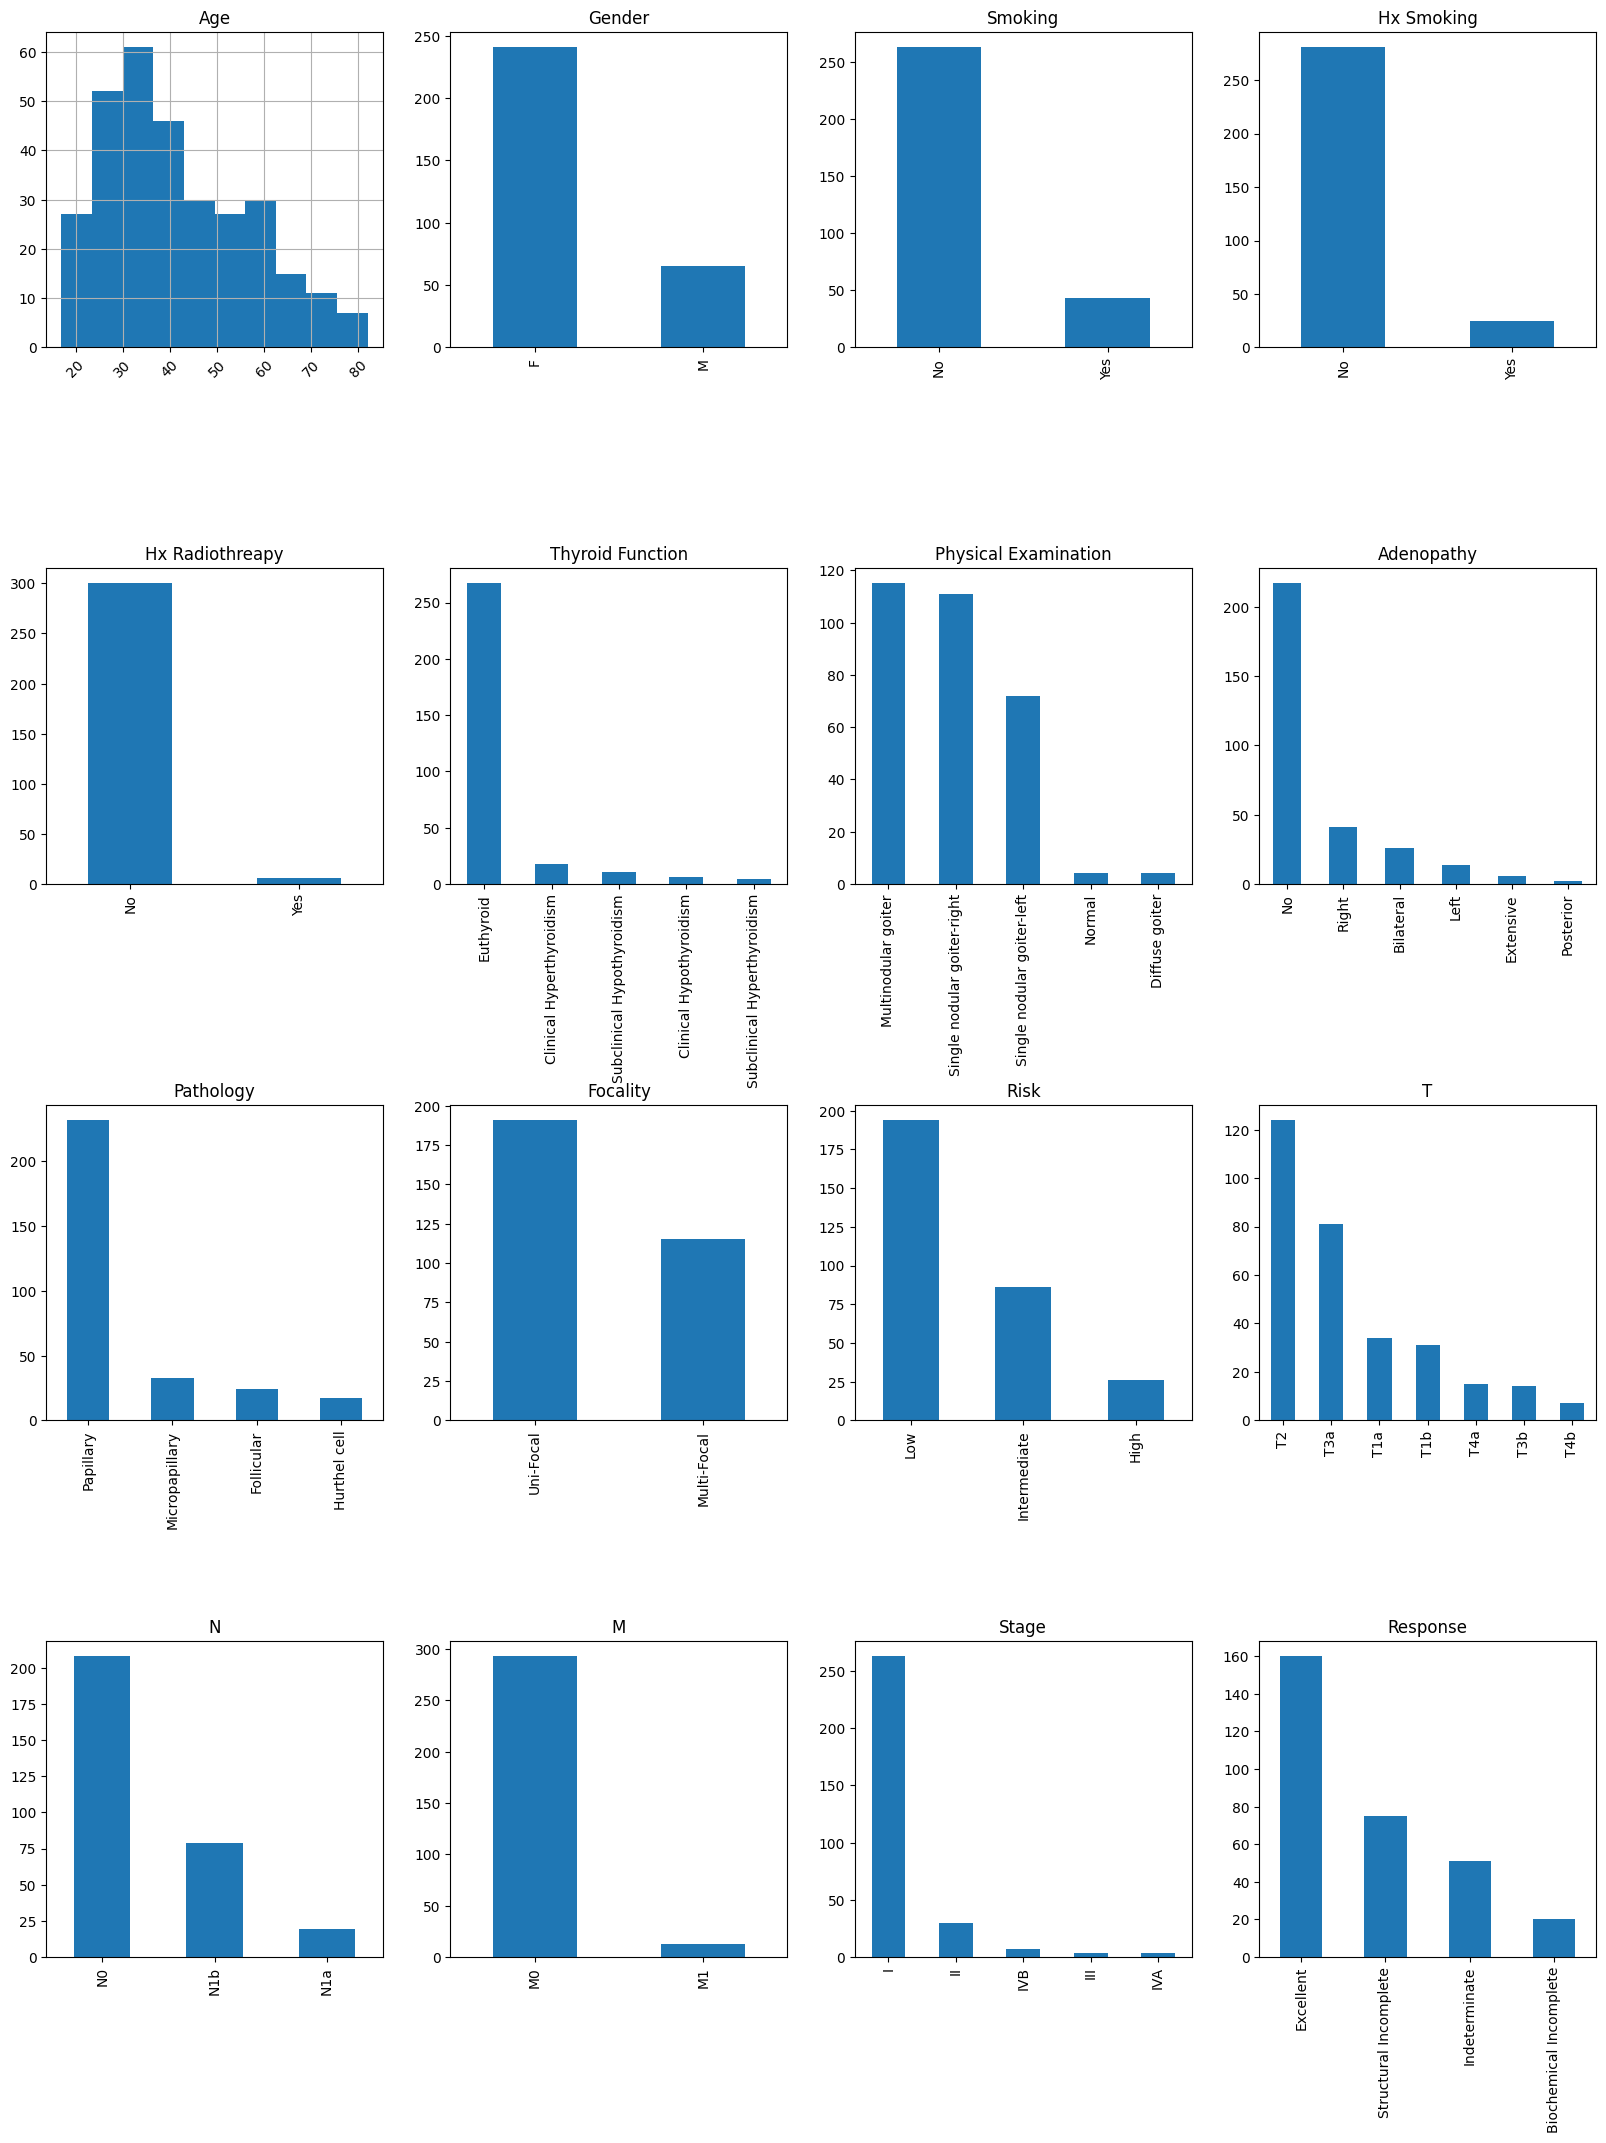

In [15]:
# Visualitation with bar diagram for categorical variables and histograms for numerical variables

fig = plt.figure(figsize=(20, 25))
cols = 4
rows = int(np.ceil(float(X_train.shape[1]) / cols))

for i, column in enumerate(X_train.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if X_train.dtypes[column] == object:
        X_train[column].value_counts().plot(kind="bar", axes=ax)
        plt.xlabel("")
        # plt.xticks(rotation=45)
    else:
        X_train[column].hist(axes=ax)
        plt.xticks(rotation=45)

plt.subplots_adjust(hspace=0.7, wspace=0.2)

In [16]:
print(cat_features)
print(num_features)

['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response']
['Age']


We can see some interesting things:

- Gender, Smoking, Hx Smoking, Hx Radiotherapy, Focality and M are binary variables. We need to make a mapping to convert values to 0 and 1

### STEP 6. PIPELINE CREATION

#### STEP 6.1. Categorical transformation

In [17]:
# We divide categorical variables in binary and other categorical because their preprocessing will be different

bin_features = ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Focality', 'M']
cat_features = ['Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Risk', 'T', 'N', 'Stage']

In [18]:
# Pipeline for preprocessing of binary variables
# This function let variables transform into boolean (not needed for variable FastinBS because it is already boolean)

def cat_binary(df):
    df['Gender'] = df['Gender'] == 'M'
    df['Smoking'] = df['Smoking'] == 'Yes'
    df['Hx Smoking'] = df['Hx Smoking'] == 'Yes'
    df['Hx Radiothreapy'] = df['Hx Radiothreapy'] == 'Yes'
    df['Focality'] = df['Focality'] == 'Multi-Focal'
    df['M'] = df['M'] == 'M1'
    return df

In [19]:
encod_bin = FunctionTransformer(cat_binary, feature_names_out = 'one-to-one')

bin_pipeline = Pipeline(
    [("Binary", encod_bin)])

# Pipeline for preprocessing of categorical variables

# cat_pipeline = Pipeline(
#     [("OHEncoder", OneHotEncoder())])

cat_pipeline = Pipeline(
    [("LE", OrdinalEncoder(
        handle_unknown='use_encoded_value',
        unknown_value=-1
    ))])

#### STEP 6.2. Numerical transformation

In [20]:
num_pipeline = Pipeline(
    [('Standar_Scaler',StandardScaler())])

#### STEP 6.3. Complete preprocessing pipeline

In [21]:
preprocessor = ColumnTransformer(transformers=[
    ("bin", bin_pipeline, bin_features),
    ("cat", cat_pipeline, cat_features),
    ("num", num_pipeline, num_features)
    ])

#### STEP 6.4. Checking the features importance

We create a pipeline with the preprocessing and the RandomForest model for getting the features importance

In [22]:
rf_pipeline = Pipeline(
    [("Preprocesado", preprocessor),
     ("Modelo", RandomForestClassifier())
    ])

In [23]:
rf_pipeline.fit(X_train, y_train)
modelo = rf_pipeline.named_steps['Modelo'] # We extract the model from the pipeline
importancia = modelo.feature_importances_ # And the importance of the features

In [24]:
# We make pairs beetween feature and importante

importancia_features = sorted(zip(X_train.columns, importancia), key=lambda x: x[1], reverse=True) 

print("IMPORTANCIA DE LAS FEATURES")
for feature, imp in importancia_features:
    print(f"{feature}: {imp:.4f}")

IMPORTANCIA DE LAS FEATURES
Risk: 0.2124
Stage: 0.1638
N: 0.1441
T: 0.1367
Pathology: 0.0797
M: 0.0554
Age: 0.0483
Adenopathy: 0.0399
Hx Radiothreapy: 0.0339
Physical Examination: 0.0225
Gender: 0.0221
Focality: 0.0205
Thyroid Function: 0.0143
Smoking: 0.0054
Hx Smoking: 0.0010


### STEP 7. PIPELINE FOR MODELING

#### STEP 7.1. Define the metric and the folds for cross-validation

As target is not balanced, we will use balanced_accuracy as metric

In [25]:
metric = 'accuracy'
cv = 5

#### STEP 7.2. Selection of features

In [26]:
# Selection the most important features with RandomForest

feature_selector = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42)
    )

#### STEP 7.3. Pipeline for models

In [27]:
cat_pipeline = Pipeline(
    [("OHEncoder", OneHotEncoder(handle_unknown='ignore'))])

In [28]:
preprocessor = ColumnTransformer(transformers=[
    ("bin", bin_pipeline, bin_features),
    ("cat", cat_pipeline, cat_features),
    ("num", num_pipeline, num_features)
    ])

In [29]:
# Pipeline with preprocessing, selection of features and model

logistic_pipeline = Pipeline(
    [("Preprocesado", preprocessor),
     ("Selección_features", feature_selector),
     ("Modelo", LogisticRegression(class_weight='balanced'))
    ])

random_pipeline = Pipeline(
    [("Preprocesado", preprocessor),
     ("Selección_features", feature_selector),
     ("Modelo", RandomForestClassifier(class_weight='balanced'))
    ])

xgb_pipeline = Pipeline(
    [("Preprocesado", preprocessor),
     ("Selección_features", feature_selector),
     ("Modelo", XGBClassifier(class_weight='balanced'))
    ])

dec_tree_pipeline = Pipeline(
    [("Preprocesado", preprocessor),
     ("Selección_features", feature_selector),
     ("Modelo", DecisionTreeClassifier(class_weight='balanced'))
    ])

light_pipeline = Pipeline(
    [("Preprocesado", preprocessor),
     ("Selección_features", feature_selector),
     ("Modelo", LGBMClassifier(class_weight='balanced', verbose = -100))
    ])

dl_pipeline = Pipeline([("preprocesado", preprocessor),
                   ("modelo", MLPClassifier(max_iter= 5000, random_state= 42, batch_size= 32)) 
                  ])

In [30]:
# Example of use of pipeline

xgb_pipeline

Pipeline(steps=[('Preprocesado',
                 ColumnTransformer(transformers=[('bin',
                                                  Pipeline(steps=[('Binary',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<function cat_binary at 0x0000020F4262CAE0>))]),
                                                  ['Gender', 'Smoking',
                                                   'Hx Smoking',
                                                   'Hx Radiothreapy',
                                                   'Focality', 'M']),
                                                 ('cat',
                                                  Pipeline(steps=[('OHEncoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Thyroi...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

#### STEP 7.4. Cross-validation with models without adjusting of hyperparameters

In [31]:
# Iterating around the models

for name, pipe in zip(["Logistic", "RandomF", "XGB", "DecTree", "LGMB", "MLP"],[logistic_pipeline, random_pipeline, xgb_pipeline, dec_tree_pipeline, light_pipeline, dl_pipeline]):
    start_time = time.time()
    resultado = cross_val_score(pipe, X_train, y_train, cv=cv, scoring=metric)
    end_time = time.time()
    elapsed_time = end_time - start_time 

    print(f"{name}: {np.mean(resultado):.4f}")
    print(f"Scores: {resultado}")
    print(f"Tiempo de CV: {elapsed_time:.2f} segundos\n")

Logistic: 0.8792
Scores: [0.85483871 0.90163934 0.8852459  0.80327869 0.95081967]
Tiempo de CV: 1.61 segundos

RandomF: 0.8659
Scores: [0.90322581 0.8852459  0.83606557 0.81967213 0.8852459 ]
Tiempo de CV: 1.98 segundos



c:\Users\ancar\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:03:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\ancar\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:03:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\ancar\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:03:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  w

XGB: 0.8726
Scores: [0.87096774 0.90163934 0.8852459  0.83606557 0.86885246]
Tiempo de CV: 1.34 segundos

DecTree: 0.8594
Scores: [0.87096774 0.8852459  0.83606557 0.78688525 0.91803279]
Tiempo de CV: 1.11 segundos



c:\Users\ancar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ancar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ancar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ancar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ancar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\d

LGMB: 0.8791
Scores: [0.87096774 0.8852459  0.8852459  0.83606557 0.91803279]
Tiempo de CV: 1.41 segundos

MLP: 0.8758
Scores: [0.87096774 0.91803279 0.85245902 0.81967213 0.91803279]
Tiempo de CV: 6.37 segundos



*The best model is Logistic Regression with an balanced_accuracy of 87,22%. Now we are going to adjust hyperparameters for trying to get a better model or a better balanced_accuracy. In this case we won't optimize MLP*

#### STEP 7.5. Adjust hyperparameters

In [32]:
pipe_reg_log_param = {
    "Modelo__penalty": ["l2"], 
    "Modelo__C": np.logspace(0, 4, 10)
    }

pipe_rand_forest_param = {
    'Modelo__n_estimators': [10, 100, 200, 400],
    'Modelo__max_depth': [1,2,4,8],
    'Modelo__max_features': [1, 2, 3]
    }

pipe_xgb_param = {
    'Modelo__n_estimators': [10, 100, 200, 400],
    'Modelo__max_depth': [1,2,4,8],
    'Modelo__learning_rate': [0.1,0.2,0.5,1.0],
    }

pipe_dec_tree_param = {
    'Modelo__max_depth': [None, 5, 10, 20, 30],
    'Modelo__min_samples_split': [2, 5, 10],
    'Modelo__min_samples_leaf': [1, 2, 4],
    'Modelo__max_features': [None, 'sqrt', 'log2'],
    'Modelo__criterion': ['gini', 'entropy'],
}

pipe_lgmb_param = {
    'Modelo__n_estimators': [100,200],
    'Modelo__learning_rate': [0.1,0.5,1],
    'Modelo__max_depth': [5,10,15],
    'Modelo__min_data_child_samples': [1,10,20,100]
}


gs_reg_log = GridSearchCV(logistic_pipeline,
                          pipe_reg_log_param,
                          cv=cv,
                          scoring=metric,
                          verbose=1,
                          n_jobs=-1)

gs_rand_forest = GridSearchCV(random_pipeline,
                              pipe_rand_forest_param,
                              cv=cv,
                              scoring=metric,
                              verbose=1,
                              n_jobs=-1)

gs_xgb = GridSearchCV(xgb_pipeline,
                      pipe_xgb_param,
                      cv=cv,
                      scoring=metric,
                      verbose=1,
                      n_jobs=-1)

gs_dec_tree = GridSearchCV(dec_tree_pipeline,
                           pipe_dec_tree_param,
                           cv=cv,
                           scoring=metric,
                           verbose=1,
                           n_jobs=-1)

gs_lgmb = GridSearchCV(light_pipeline,
                       pipe_lgmb_param,
                       cv=cv,
                       scoring=metric,
                       verbose=1,
                       n_jobs=-1)

# Dict with pipelines

pipe_grids = {"gs_reg_log":gs_reg_log,
              "gs_rand_forest":gs_rand_forest,
              "gs_xgb":gs_xgb,
              "gs_dec_tree":gs_dec_tree,
              "gs_lgmb":gs_lgmb}

In [33]:
# Execut GridSearch for each model

for nombre, grid_search in pipe_grids.items():

    start_time = time.time() 
    grid_search.fit(X_train, y_train)
    end_time = time.time() 
    elapsed_time = end_time - start_time

    print(f"Tiempo de GS para {nombre}: {elapsed_time:.2f} segundos\n")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tiempo de GS para gs_reg_log: 6.68 segundos

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Tiempo de GS para gs_rand_forest: 37.54 segundos

Fitting 5 folds for each of 64 candidates, totalling 320 fits


c:\Users\ancar\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:04:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Tiempo de GS para gs_xgb: 29.85 segundos

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Tiempo de GS para gs_dec_tree: 99.12 segundos

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Tiempo de GS para gs_lgmb: 35.00 segundos



c:\Users\ancar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [34]:
# Best GridSearch for each model in a dataframe

best_grids = [(i, j.best_score_) for i, j in pipe_grids.items()]
best_grids = pd.DataFrame(best_grids, columns=["Grid", "Best score"]).sort_values(by="Best score", ascending=False)
best_grids

,Grid,Best score
2,gs_xgb,0.905288
1,gs_rand_forest,0.888789
3,gs_dec_tree,0.882496
0,gs_reg_log,0.879164
4,gs_lgmb,0.879112


*The best model with hyperparameters adjusted is the one with the best score in the GridSearch. In this case, it is the Random Forest model with a score of 88,56%*

### STEP 8. SAVE THE BEST MODEL

In [35]:
# Best model pipeline

best_model = pipe_grids[best_grids.iloc[0,0]]
best_model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Preprocesado',
                                        ColumnTransformer(transformers=[('bin',
                                                                         Pipeline(steps=[('Binary',
                                                                                          FunctionTransformer(feature_names_out='one-to-one',
                                                                                                              func=<function cat_binary at 0x0000020F4262CAE0>))]),
                                                                         ['Gender',
                                                                          'Smoking',
                                                                          'Hx '
                                                                          'Smoking',
                                                                          'Hx '
                                                                          'Radiothreapy',
                                                                          'Focality',
                                                                          'M']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('OHEncoder',
                                                                                          OneHotEncoder(hand...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'Modelo__learning_rate': [0.1, 0.2, 0.5, 1.0],
                         'Modelo__max_depth': [1, 2, 4, 8],
                         'Modelo__n_estimators': [10, 100, 200, 400]},
             scoring='accuracy', verbose=1)

In [36]:
try:
    pickle.dumps(best_model)  
    print("El modelo es compilable ✅")
except Exception as e:
    print(f"Error de compilación ❌: {e}")

El modelo es compilable ✅


In [37]:
# Save the model

def find_repo_root():
    current_dir = os.getcwd()
    while current_dir != os.path.dirname(current_dir):  # Stop at the root directory
        if "src" in os.listdir(current_dir):  # Assumes 'src' is in repo root
            return current_dir
        current_dir = os.path.dirname(current_dir)  # Move up one level
    return os.getcwd()  # Default to current dir if nothing found

# Find the current repo root

repo_root = find_repo_root()

# Define the to src/models

folder_path = os.path.join(repo_root, "src", "models")

# Define the path to save the model el path para salvar el modelo

model_path = os.path.join(folder_path, "modelo_pipeline.pkl")

# Save the model

with open(model_path, "wb") as archivo:
    pickle.dump(best_model, archivo)

print(f"Model saved at: {model_path}")

Model saved at: c:\Users\ancar\Online_Env\Data_Science_Projects\Thyroid_Cancer\src\models\modelo_pipeline.pkl


### STEP 9. EVALUATE THE MODEL TO TEST SET

In [38]:
y_test = y_test.map({'No': 0, 'Yes': 1}).copy().astype('boolean')

In [39]:
print(classification_report(y_test, best_model.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93        58
         1.0       0.87      0.68      0.76        19

    accuracy                           0.90        77
   macro avg       0.88      0.82      0.85        77
weighted avg       0.89      0.90      0.89        77



[[56  2]
 [ 6 13]]


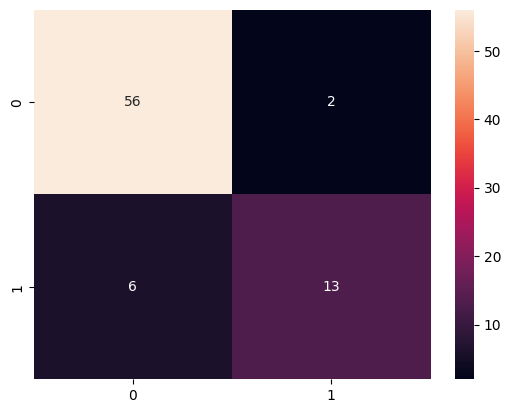

In [40]:
c_matrix = confusion_matrix(y_test, best_model.predict(X_test))
print(c_matrix)
import seaborn as sns
sns.heatmap(c_matrix, annot=True);

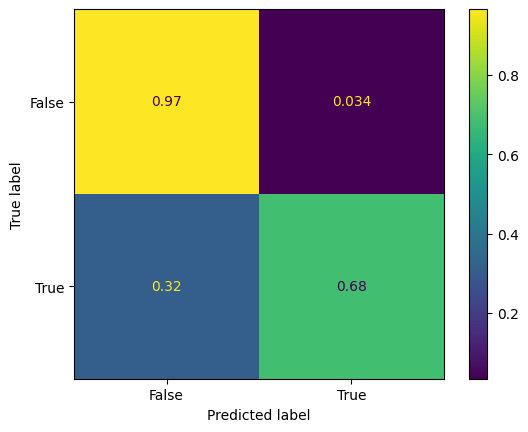

In [41]:
ConfusionMatrixDisplay.from_predictions(y_test, best_model.predict(X_test), normalize = "true")